In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os import listdir
from os.path import isfile, join
from PIL import Image

In [2]:
data_filenames = []
for root, dirs, files in os.walk('data/raw_images/'):  
    for filename in files:
        data_filenames.append(filename)

data = [Image.open('data/raw_images/' + filename) for filename, i in zip(data_filenames , range(100))]

annot_filenames = []
for root, dirs, files in os.walk('data/class_color/'):  
    for filename in files:
        annot_filenames.append(filename)
        
annot = [Image.open('data/class_color/' + filename) for filename, i in zip(annot_filenames , range(100))]

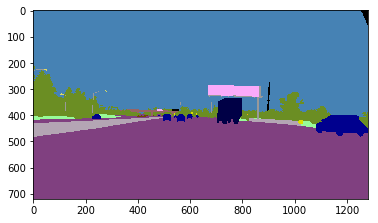

In [3]:
nb_samples=len(data_filenames)
valid_split = 0.2
test_split = 0.1

data_train = data[0:int(nb_samples*(1-valid_split-test_split))]
annot_train = annot[0:int(nb_samples*(1-valid_split-test_split))]
data_valid = data[int(nb_samples*(1-valid_split-test_split)):int(nb_samples*(1-test_split))]
annot_valid = annot[int(nb_samples*(1-valid_split-test_split)):int(nb_samples*(1-test_split))]
data_test  = data[int(nb_samples*(1-test_split)):]
annot_test  = annot[int(nb_samples*(1-test_split)):]

image = annot_train[0]
plt.imshow(image)
plt.show()



In [4]:
categories = pd.read_csv('data/categories.csv', sep=',')
categories.head()
print('Number of categories:', len(categories), "\n")


Number of categories: 41 



In [5]:
#number of dataset
print(len(data))

100


In [6]:
subcat = []
no_subcat = 0
for row in categories.name:
    subcat.append(row)
no_subcat = len(subcat)

cat = []
for row in categories.category:
    cat.append(row)

catid = []
for row in categories.catId:
    catid.append(row)
no_cat = 1
act = catid[0]
for i in range(len(catid)):
    if catid[i]!=act:
        no_cat+=1
        act=catid[i]

col = []
for row in categories.color:
    c = row.replace(" ", "").split(',')
    rgb = []
    for i in c:
        rgb.append(int(i))
    col.append(rgb)

print("Subcategories and their representational colors [R, G, B]: \n")
for i in range(len(subcat)):
    print("%30s \t" % subcat[i], end ="")
    print(col[i])

print("\nSubcategories by their categories: \n")
act = cat[0]
print(cat[0] + ":")
for i in range(no_subcat):
    if cat[i] != act:
        print("\n" + cat[i] + ":")
        act=cat[i]
    print("\t\t"+subcat[i])

Subcategories and their representational colors [R, G, B]: 

                     unlabeled 	[0, 0, 0]
                       dynamic 	[111, 74, 0]
                   ego vehicle 	[0, 0, 0]
                        ground 	[81, 0, 81]
                        static 	[0, 0, 0]
                       parking 	[250, 170, 160]
                    rail track 	[230, 150, 140]
                          road 	[128, 64, 128]
                      sidewalk 	[244, 35, 232]
                        bridge 	[150, 100, 100]
                      building 	[70, 70, 70]
                         fence 	[190, 153, 153]
                        garage 	[180, 100, 180]
                    guard rail 	[180, 165, 180]
                        tunnel 	[150, 120, 90]
                         wall  	[102, 102, 156]
                        banner 	[250, 170, 100]
                     billboard 	[220, 220, 250]
                  lane divider 	[255, 165, 0]
                  parking sign 	[220, 20, 60]
              

In [7]:
colors = []
for img in annot_train:

    im_rgb = img.convert('RGB')
    colors.append(im_rgb.getcolors())


count_categories = []
count = []
for i in range(no_subcat):
    count_categories.append(0)
    count.append(0)
    
cat_col = []

for i in range(len(subcat)):
    cat_col.append([subcat[i], col[i]])

count = np.zeros(len(subcat), dtype=int)
count_categories = np.zeros(len(cat), dtype=int)

for k in colors:
    for j in range(len(k)):
        for i in range(len(cat_col)):
            if(tuple(cat_col[i][1]) == k[j][1]):
                count[i] += 1
        

for i in range(len(subcat)):
    print(subcat[i] + ": ", end='')
    print(count[i])

unlabeled: 70
dynamic: 11
ego vehicle: 70
ground: 33
static: 70
parking: 10
rail track: 0
road: 69
sidewalk: 30
bridge: 23
building: 60
fence: 19
garage: 0
guard rail: 57
tunnel: 6
wall : 15
banner: 2
billboard: 0
lane divider: 0
parking sign: 9
pole: 68
polegroup: 68
street light: 5
traffic cone: 0
traffic device: 1
traffic light: 15
traffic sign: 63
traffic sign frame: 2
terrain: 34
vegetation: 64
sky: 67
person: 9
rider: 1
bicycle: 0
bus: 15
car: 69
caravan: 0
motorcycle: 1
trailer: 0
train: 1
truck: 36
